In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'w'

# Larval data

In [2]:
FAdata = pd.read_excel('./FA_discs_dilp8_KOKO.xlsx', header=1, sheet_name=None)

In [3]:
times = list(FAdata.keys())

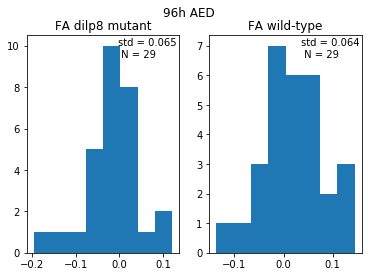

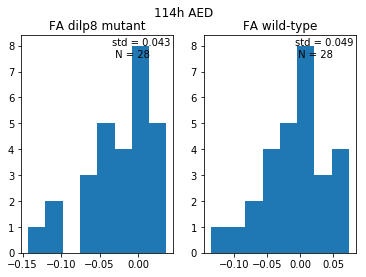

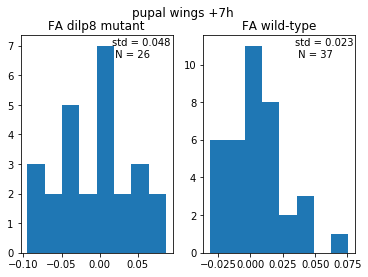

In [4]:
for t in times:
    fig, ax = plt.subplots(nrows=1, ncols=2)
    data = FAdata[t]
    wt_data = np.array(data['% diff'][:50][~np.isnan(data['% diff'][:50])])
    mutant_data = np.array(data['% diff.1'][:50][~np.isnan(data['% diff.1'][:50])])
    ax[1].hist(wt_data, bins=8)
    ax[0].hist(mutant_data, bins=8)
    ax[1].set_title('FA wild-type')
    ax[0].set_title('FA dilp8 mutant')
    ax[1].text(0.6, 0.9, "std = %.3f \n N = %d "%(np.std(wt_data), len(wt_data)), transform=ax[1].transAxes)
    ax[0].text(0.6, 0.9, "std = %.3f \n N = %d "%(np.std(mutant_data), len(mutant_data)), transform=ax[0].transAxes)
    fig.suptitle(t)

# Adult wing data

In [5]:
adult_data = pd.read_excel('./FAi Dilp8.xlsx', header=3, sheet_name=0)

In [6]:
adult_data.head()

,dilp8-/-,Unnamed: 1,Unnamed: 2,Unnamed: 3,diff,abs,Unnamed: 6,dilp8+/-,Unnamed: 8,Unnamed: 9,...,diff.1,abs.1,Unnamed: 13,w-,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,"a1,tif",134.966,136.813,"a2,tif",1.847,1.847,NaN,"wa1,tif",112.932,114.004,...,-1.072,1.072,NaN,"wab2,tif",127.404,126.117,"wab1,tif",1.287,1.287,1.287
1,"c1,tif",124.715,126.345,"c2,tif",1.63,1.630,NaN,"waa1,tif",128.508,128.266,...,0.242,0.242,NaN,"wad1,tif",104.319,105.126,"wad2,tif",-0.807,0.807,0.807
2,"d1,tif",130.108,127.461,"d2,tif",-2.647,2.647,NaN,"wab1,tif",139.744,136.692,...,3.052,3.052,NaN,"wae1,tif",84.343,83.344,"wae2,tif",0.999,0.999,0.999
3,"f1,tif",133.726,133.035,"f2,tif",-0.691,0.691,NaN,"wac1,tif",128.559,128.931,...,-0.372,0.372,NaN,"wag1,tif",122.249,121.014,"wag2,tif",1.235,1.235,1.235
4,"g1,tif",138.734,136.269,"g2,tif",-2.465,2.465,NaN,"wad1,tif",122.368,122.537,...,-0.169,0.169,NaN,"wah1,tif",121.287,122.539,"wah2,tif",-1.252,1.252,1.252


In [7]:
adult_data['mean'] = (adult_data["Unnamed: 1"]+adult_data["Unnamed: 2"])/2
adult_data['% diff'] = (adult_data['diff']/adult_data['mean'])

adult_data['mean.1'] = (adult_data["Unnamed: 8"]+adult_data["Unnamed: 9"])/2
adult_data['% diff.1'] = (adult_data['diff.1']/adult_data['mean.1'])

adult_data['mean.2'] = (adult_data["Unnamed: 15"]+adult_data["Unnamed: 16"])/2
adult_data['% diff.2'] = (adult_data['Unnamed: 18']/adult_data['mean.2'])

## Distribution of final sizes

In [8]:
np.mean(adult_data['mean']), np.mean(adult_data['mean.1']), np.mean(adult_data['mean.2'])

(127.5559423076923, 126.88241666666666, 106.08819444444445)

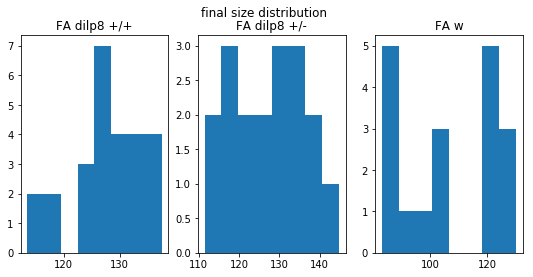

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,4))
ax[0].hist(np.array(adult_data['mean']), bins=8)
ax[1].hist(np.array(adult_data['mean.1']), bins=8)
ax[2].hist(np.array(adult_data['mean.2']), bins=8)
ax[0].set_title('FA dilp8 +/+')
ax[1].set_title('FA dilp8 +/-')
ax[2].set_title('FA w')
fig.suptitle("final size distribution");

## Distribution of final FA

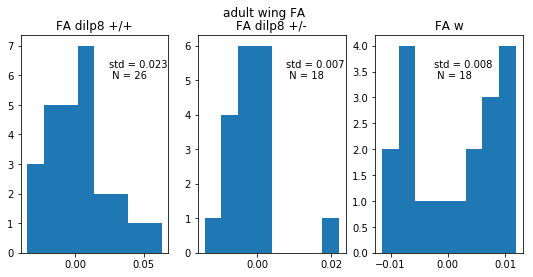

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,4))

pp_data = np.array(adult_data['% diff'].dropna(), dtype=np.float)
pn_data = np.array(adult_data['% diff.1'].dropna(), dtype=np.float)
w_data = np.array(adult_data['% diff.2'].dropna(), dtype=np.float)
ax[0].hist(pp_data, bins=8)
ax[1].hist(pn_data, bins=8)
ax[2].hist(w_data, bins=8)
ax[0].set_title('FA dilp8 +/+')
ax[1].set_title('FA dilp8 +/-')
ax[2].set_title('FA w')
ax[0].text(0.6, 0.8, "std = %.3f \n N = %d "%(np.std(pp_data), len(pp_data)), transform=ax[0].transAxes)
ax[1].text(0.6, 0.8, "std = %.3f \n N = %d "%(np.std(pn_data), len(pn_data)), transform=ax[1].transAxes)
ax[2].text(0.4, 0.8, "std = %.3f \n N = %d "%(np.std(w_data), len(w_data)),transform=ax[2].transAxes)

fig.suptitle("adult wing FA");